## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


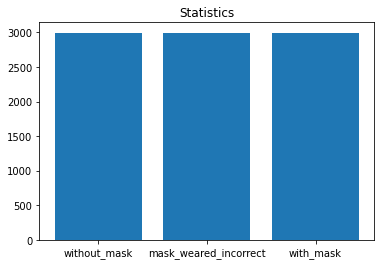

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

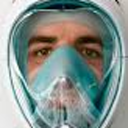

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
path = '/content/drive/MyDrive/Mask_Dataset/with_mask/1.png'
input = cv2.imread(path)

cv2_imshow(input)

cv2.waitKey()

cv2.destroyAllWindows()


In [8]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
print(input.shape)

(128, 128, 3)


In [ ]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 


In [ ]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it

In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [10]:
# Choose and define base model
base_model=tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3),
                                            include_top=False,
                                            weights='imagenet'
                                        )

base_model.trainable=False

9420800/9406464 [==============================] - 0s 0us/step


In [11]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)


In [12]:
from tensorflow.keras import models,layers

In [19]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
model = models.Sequential()
model.add(base_model)
#model.add(layers.Conv2D(6,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [20]:
# Add the final output layer
model.add(layers.Flatten())
#model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [21]:
# Print your model's summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 1280)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5120)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 15363     
                                                                 
Total params: 2,273,347
Trainable params: 15,363
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

##***The Documentation code below is taken from TF documentation([here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator))***

In [25]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code 
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
)

In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [26]:
# Your code
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


In [28]:
classes= train_ds.class_names

for i in range(len(train_ds.class_names)):
  print(classes[i])


mask_weared_incorrect
with_mask
without_mask


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [29]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
history = model.fit(train_ds ,epochs=1, 
                    validation_data= (val_ds))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


225/225 [==============================] - 1718s 7s/step - loss: 0.6196 - accuracy: 0.7396 - val_loss: 0.4512 - val_accuracy: 0.8257


### Evaluate the performance

In [30]:
test_loss, test_acc = model.evaluate(val_ds)
print(test_acc)

57/57 [==============================] - 18s 311ms/step - loss: 0.4512 - accuracy: 0.8257
0.8257238268852234


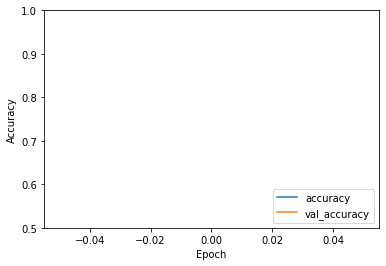

In [31]:
# Plot training & validation loss/accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# print classification report

In [34]:
import numpy as np

In [36]:
parr=model.predict(val_ds)
arr=[]
for i in range(25):
  n=np.where(parr[i]==max(parr[i]))
  arr.append(n)

In [44]:
arr[4]

(array([1]),)

In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)

IndexError: ignored

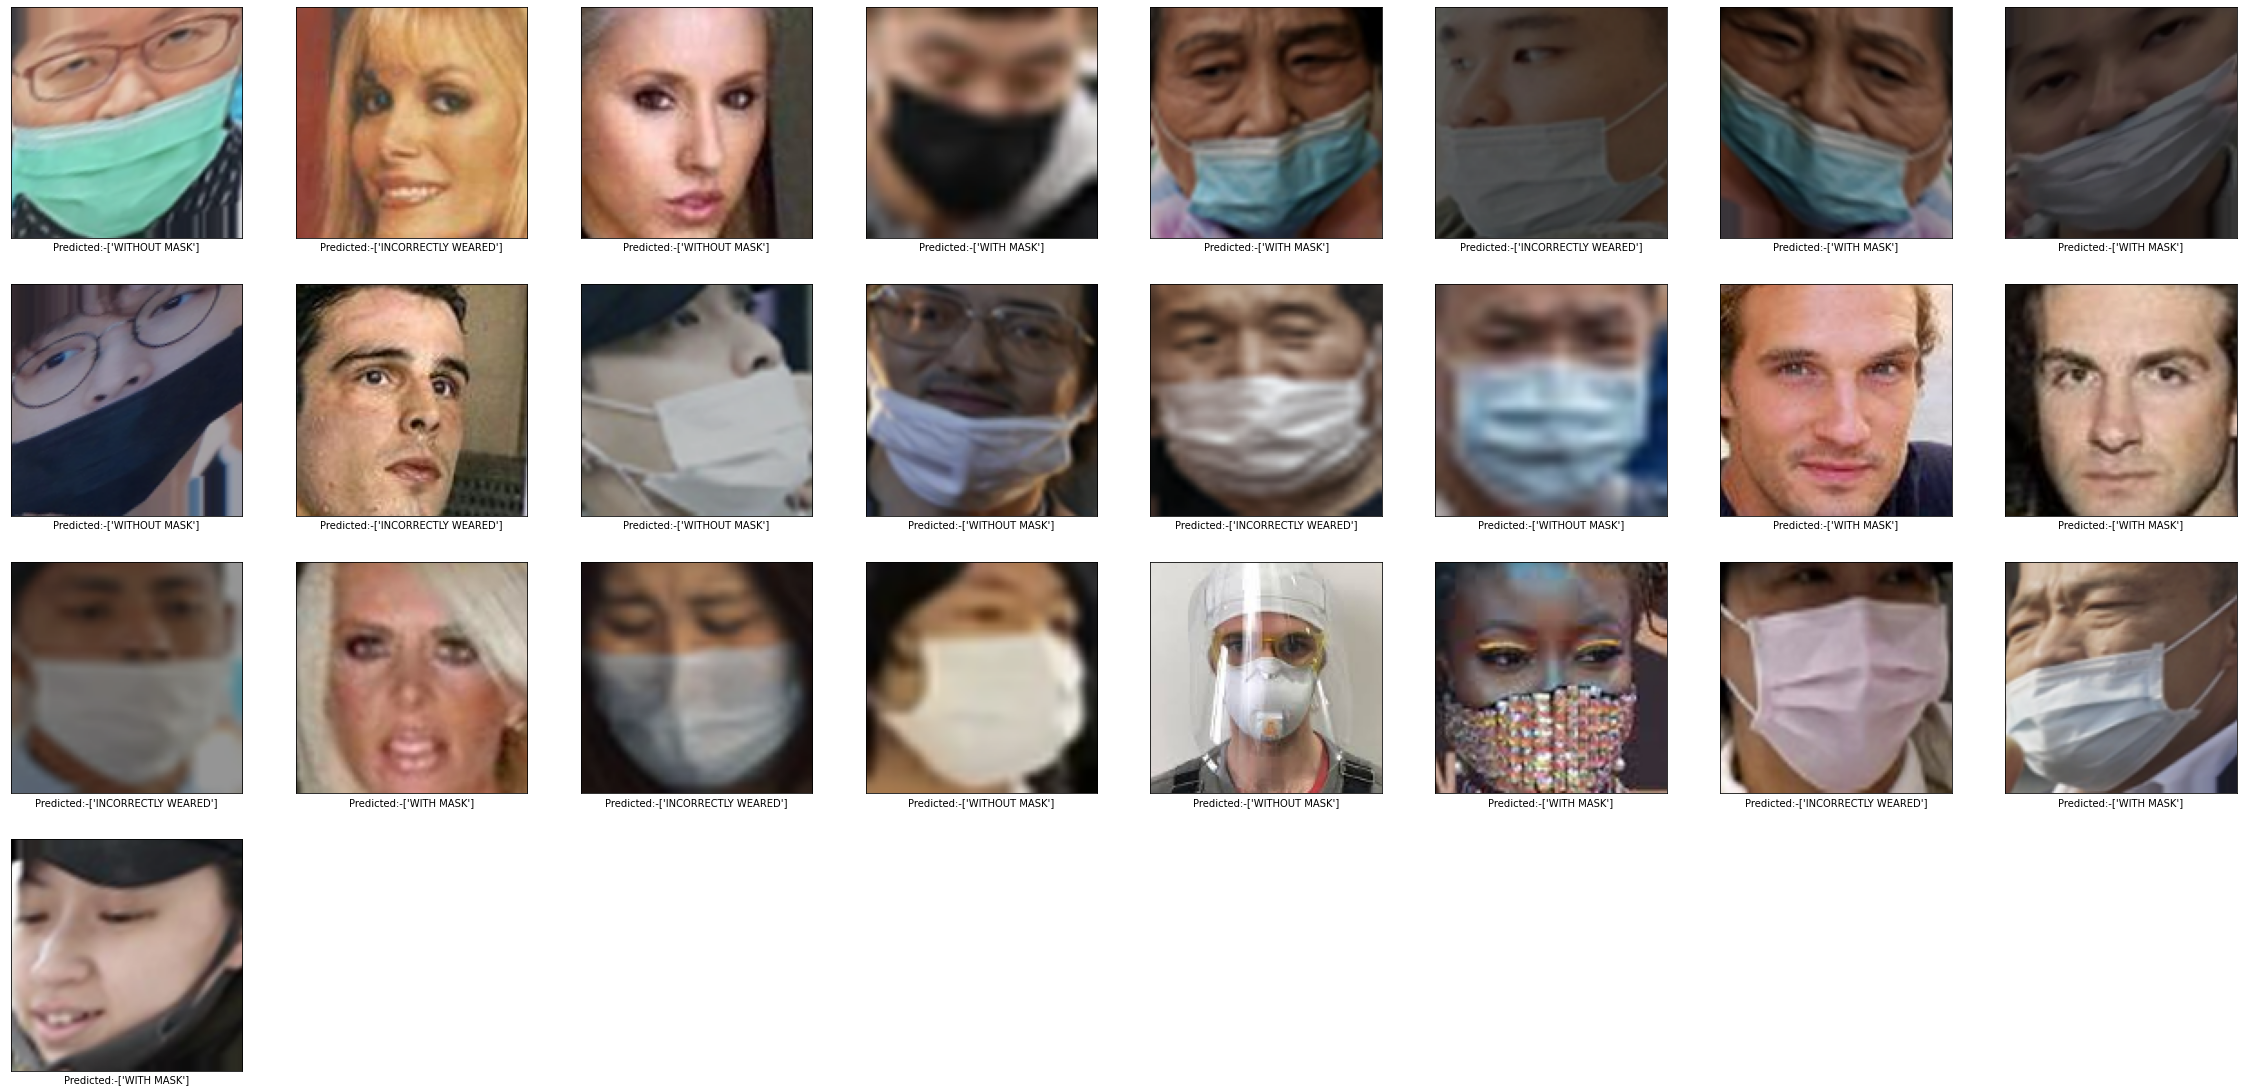

In [46]:
class_arr=np.array(["INCORRECTLY WEARED","WITH MASK","WITHOUT MASK"])
plt.figure(figsize=(40,40))
for images, labels in val_ds.take(1):
  for i in range(64):
    t1=arr[i][0]
    t2=t1%3
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.xlabel(f"Predicted:-{class_arr[t2]}")
